In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [2]:
plt.rcParams['figure.figsize'] = [10., 10.]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

# Regression

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
print(boston_dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X_train, X_test, y_train, y_test = train_test_split(boston_dataset['data'], boston_dataset['target'], test_size = 0.2, random_state=5)

We can now try out different regression models

In [7]:
# from tensorflow import keras

# inputs = keras.Input(shape=(X_train.shape[1],))
# h = keras.layers.Dense(32, activation="relu")(inputs)
# outputs = keras.layers.Dense(1, activation='linear')(h)
# reg = keras.Model(inputs=inputs, outputs=outputs)
# optimizer = keras.optimizers.Adam(0.01)

# reg.compile(loss='mse', optimizer=optimizer)

In [8]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression()

In [9]:
# from sklearn.neural_network import MLPRegressor
# reg = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=1000, tol=0.000001)

In [12]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=20, max_depth=4, criterion='mse')

In [13]:
reg.fit(X_train, y_train) #, epochs=50, verbose=0, )

RandomForestRegressor(max_depth=4, n_estimators=20)

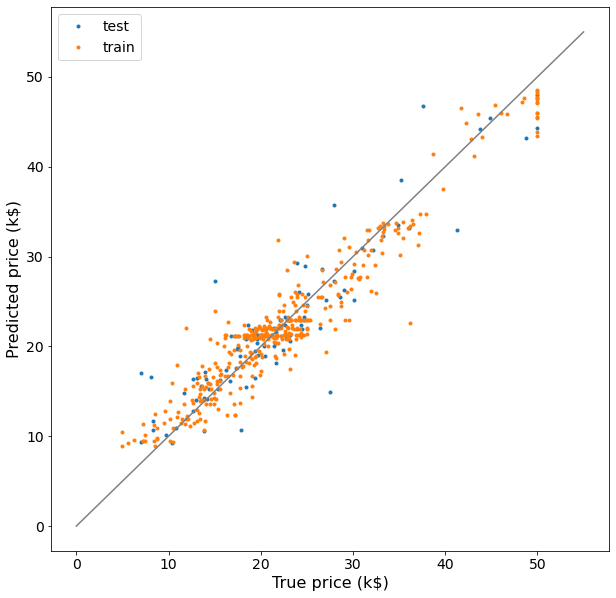

In [14]:
plt.plot(y_test, reg.predict(X_test), '.', label='test')
plt.plot(y_train, reg.predict(X_train), '.', label='train')
plt.plot([0,55], [0,55], c='grey')
plt.gca().set_xlabel('True price (k$)')
plt.gca().set_ylabel('Predicted price (k$)')
plt.legend()
#plt.savefig('boston_DT.png', bbox_inches='tight')

## Feature Importance

We can analyze the imprtance of the various input features, here done via two separate methods:. In both cases the results are comparable and `LSTAT` is the most important variable, while `ZN`, `CHAS` amd `RAD` carry virtually no information.

In [17]:
import eli5
from eli5.sklearn import PermutationImportance

You may need to `pip install eli5`
And later `pip install shap`

In [19]:
perm = PermutationImportance(reg, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = boston_dataset['feature_names'])

Weight,Feature
0.7689 ± 0.1470,LSTAT
0.4578 ± 0.0580,RM
0.1013 ± 0.0313,DIS
0.0775 ± 0.0105,CRIM
0.0091 ± 0.0034,TAX
0.0066 ± 0.0020,PTRATIO
0.0049 ± 0.0013,NOX
0.0048 ± 0.0007,AGE
0.0041 ± 0.0013,RAD
0.0017 ± 0.0011,B


In [21]:
import shap

In [25]:
shap.initjs()
X,y = shap.datasets.boston()
explainer = shap.TreeExplainer(reg)
shap_values = explainer.shap_values(X)

In [26]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [27]:
shap.force_plot(explainer.expected_value, shap_values, X)

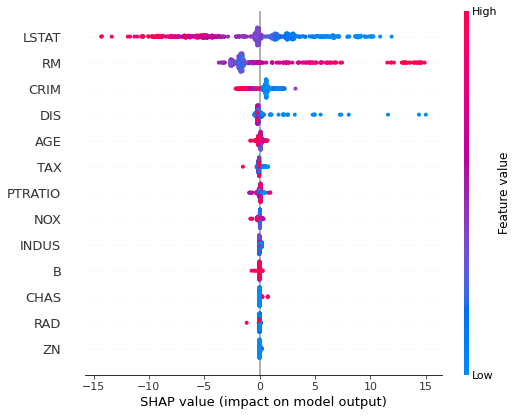

In [28]:
shap.summary_plot(shap_values, X)

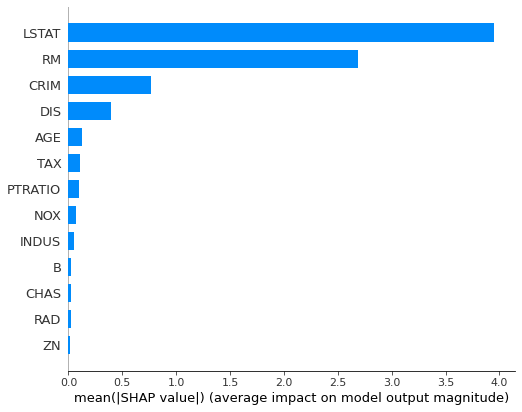

In [29]:
shap.summary_plot(shap_values, X, plot_type="bar")